# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

In [28]:
!pip install pandas numpy matplot seaborn missingno scikit-learn scipy imbalanced-learn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 1. Exploratieve Data Analyse (EDA)

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.1 Uitleg van iedere kolom

0: id: uniek id van het persoon

1: age: leeftijd

3: hypertension: hoge bloeddruk (0 is nee, 1 is ja)

4: heart_disease: hart- en vaatziekten (0 is nee, 1 is ja)

5: avg_glucose_level: gemiddeld glucoselevel gemeten in mmol/L

6: bmi: bmi van de persoon 

7: gender_female: geslacht (True or False)

8: Gender_other: People who identify as something other than male or female

9: Every_married_no: geeft aan wie er niet getrouwd is.

10: Every_married_yes: geeft aan wie er wel getrouwd is.

11: Work_type_Govt_job: geeft aan wie er een baan heeft die te maken heeft met veiligheid van de bevolking.

12: work_type_never_worked: mensen die nooit gewerkt hebben.

13: work_type_private_work: mensen die privé werk doen.

14: work_type_Self_employed: mensen die eigen baas zijn.

15: work_type_children: ?

16: Residence_type_rural: heeft de person een huis in een landelijk gebied. (True or False)

17: Residence_type_urban: heeft de persoon een huis in een stedelijk gebied. (True or False)

18: Smoking_status_formerly smoked: heeft de person in het verleden gerookt.  (True or False)

19: Smoking_status_never smoked: heeft de persoon ooit gerookt.  (True or False)

20: Smoking_status_smokes: Rookt de persoon momenteel actief.  (True or False)

21: Stroke: Heeft de persoon een beroerte gehad. (True or False)


### 1.2 Beschrijf in hoeverre de data voldoet aan de minimale vereisten voor Machine Learning met Scitkit Learn

In [31]:
display(train.head())
display(train.info())
display(train.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

None

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


<Axes: >

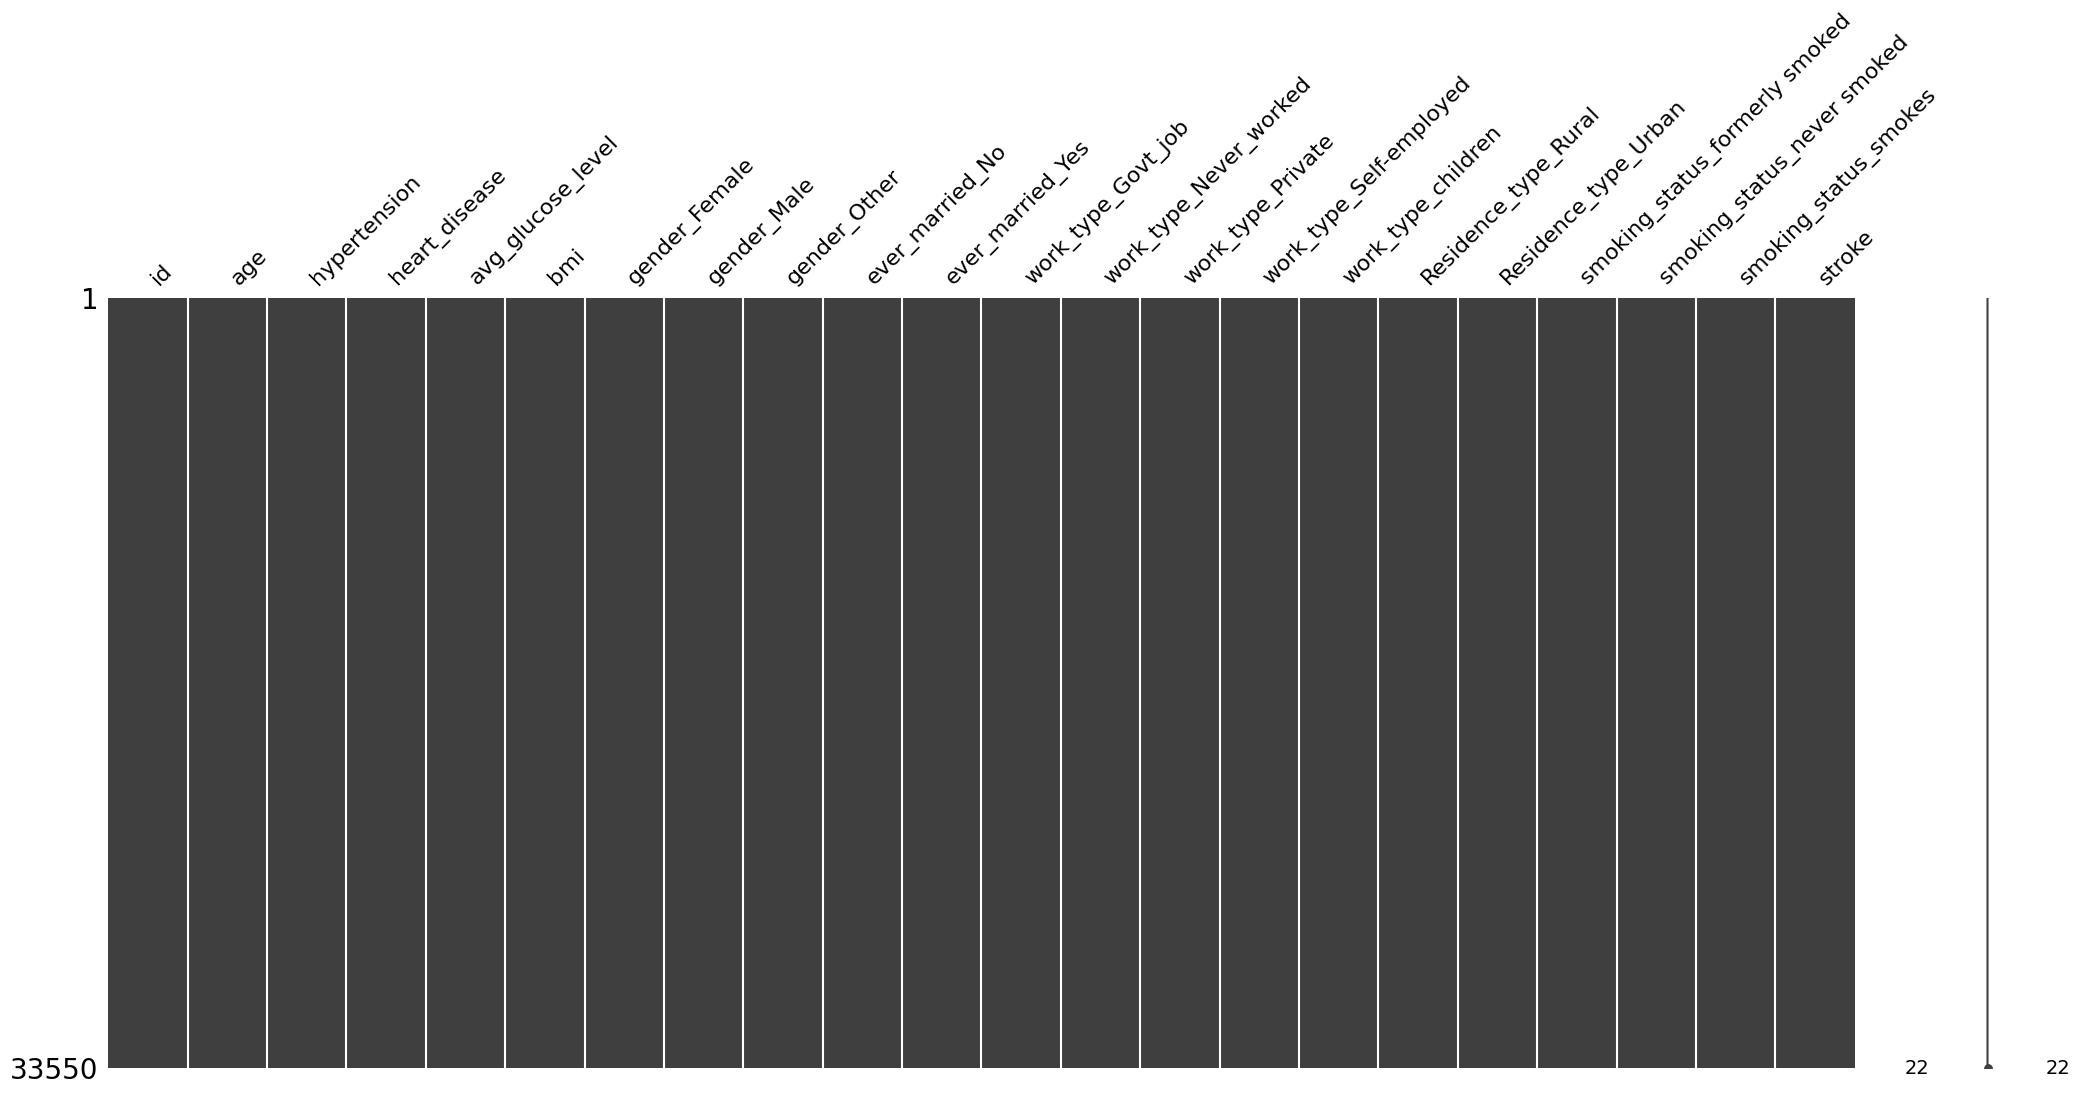

In [32]:
# Kijken of er missende data in de traindata zit
msno.matrix(train)

<Axes: >

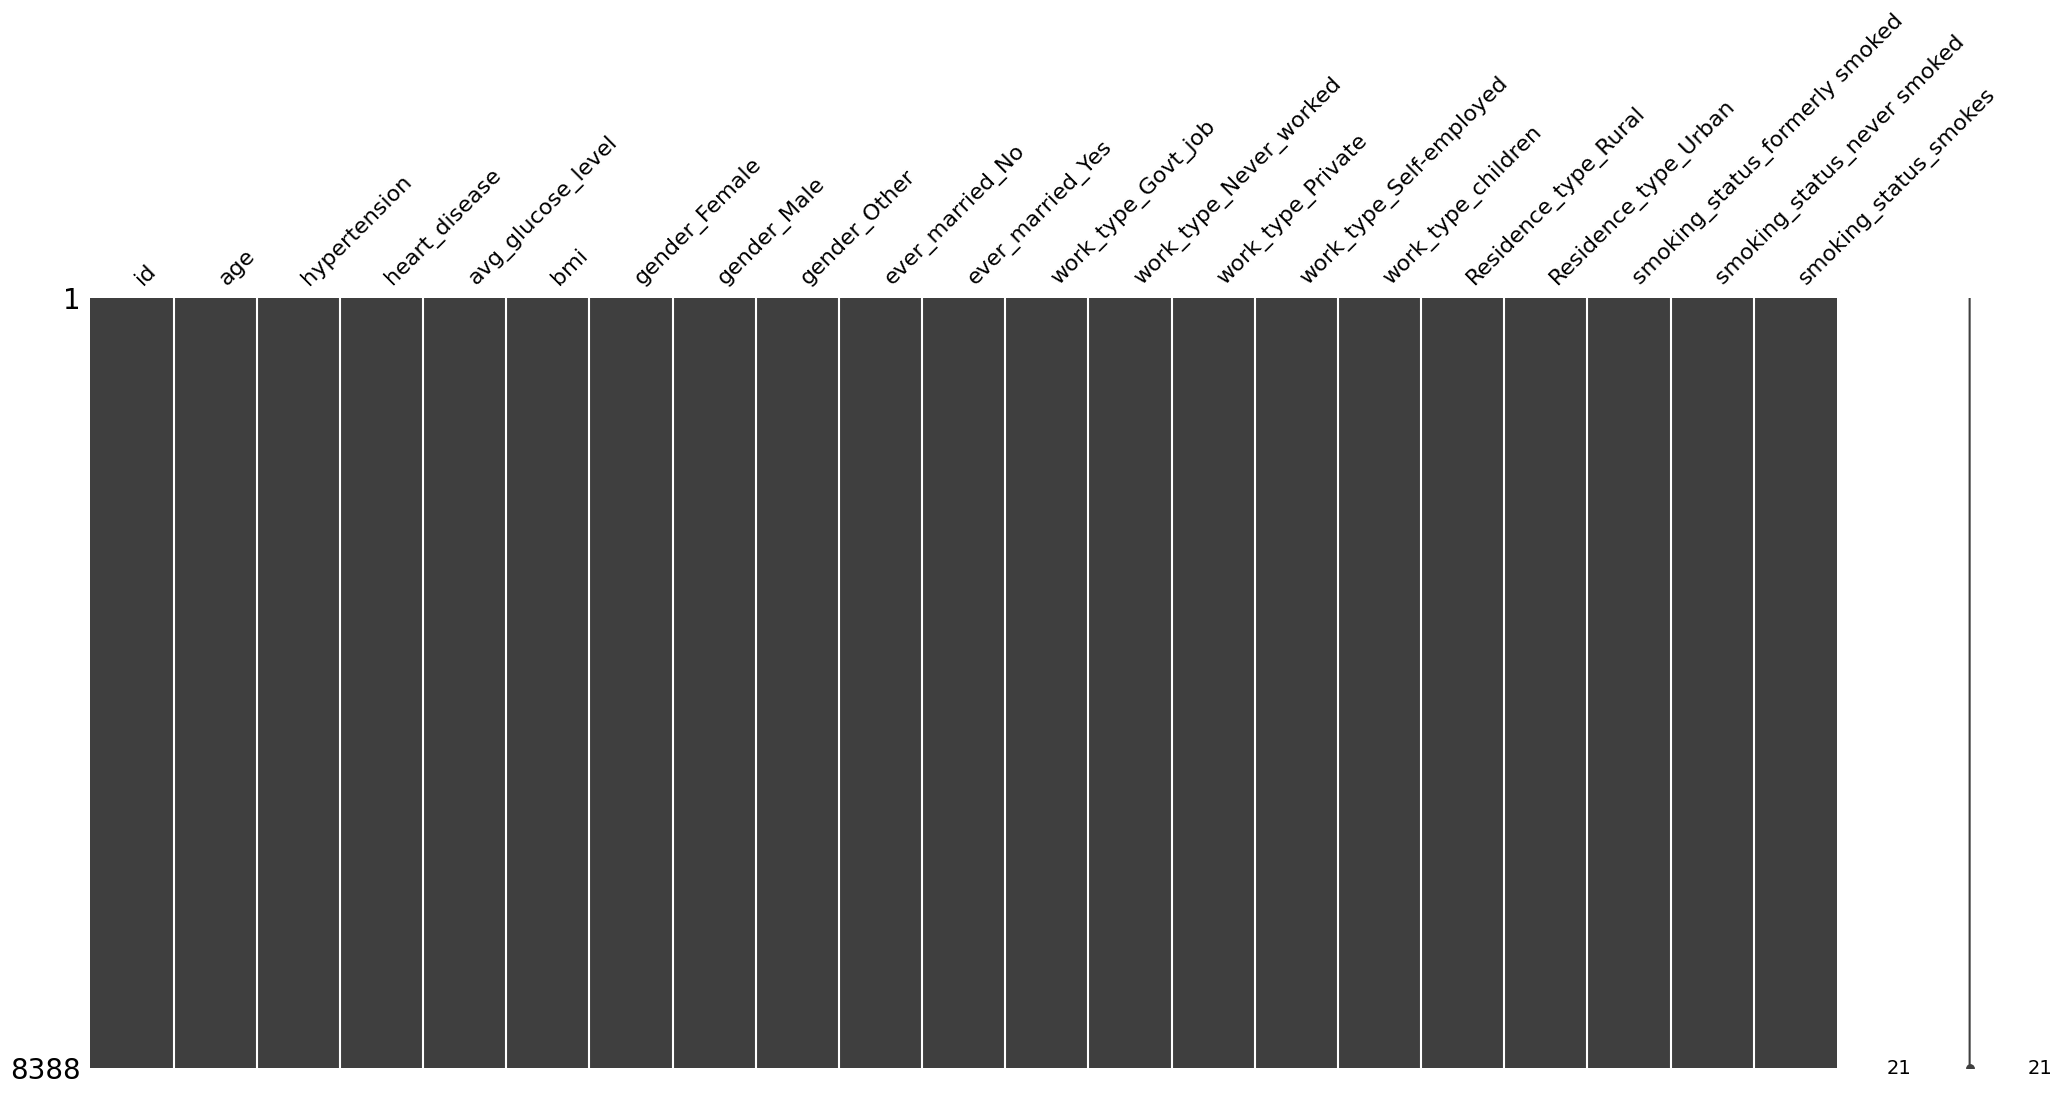

In [33]:
# Kijken of er missende data in de testdata zit
msno.matrix(test)

EDA: Voldoet aan de eisen, geen missende waarden etc.

### 1.2.1 maak de evenutele aanpassingen

In [34]:
# Booleans omzetten naar 0 en 1

train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

### 1.3 Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties

<Axes: >

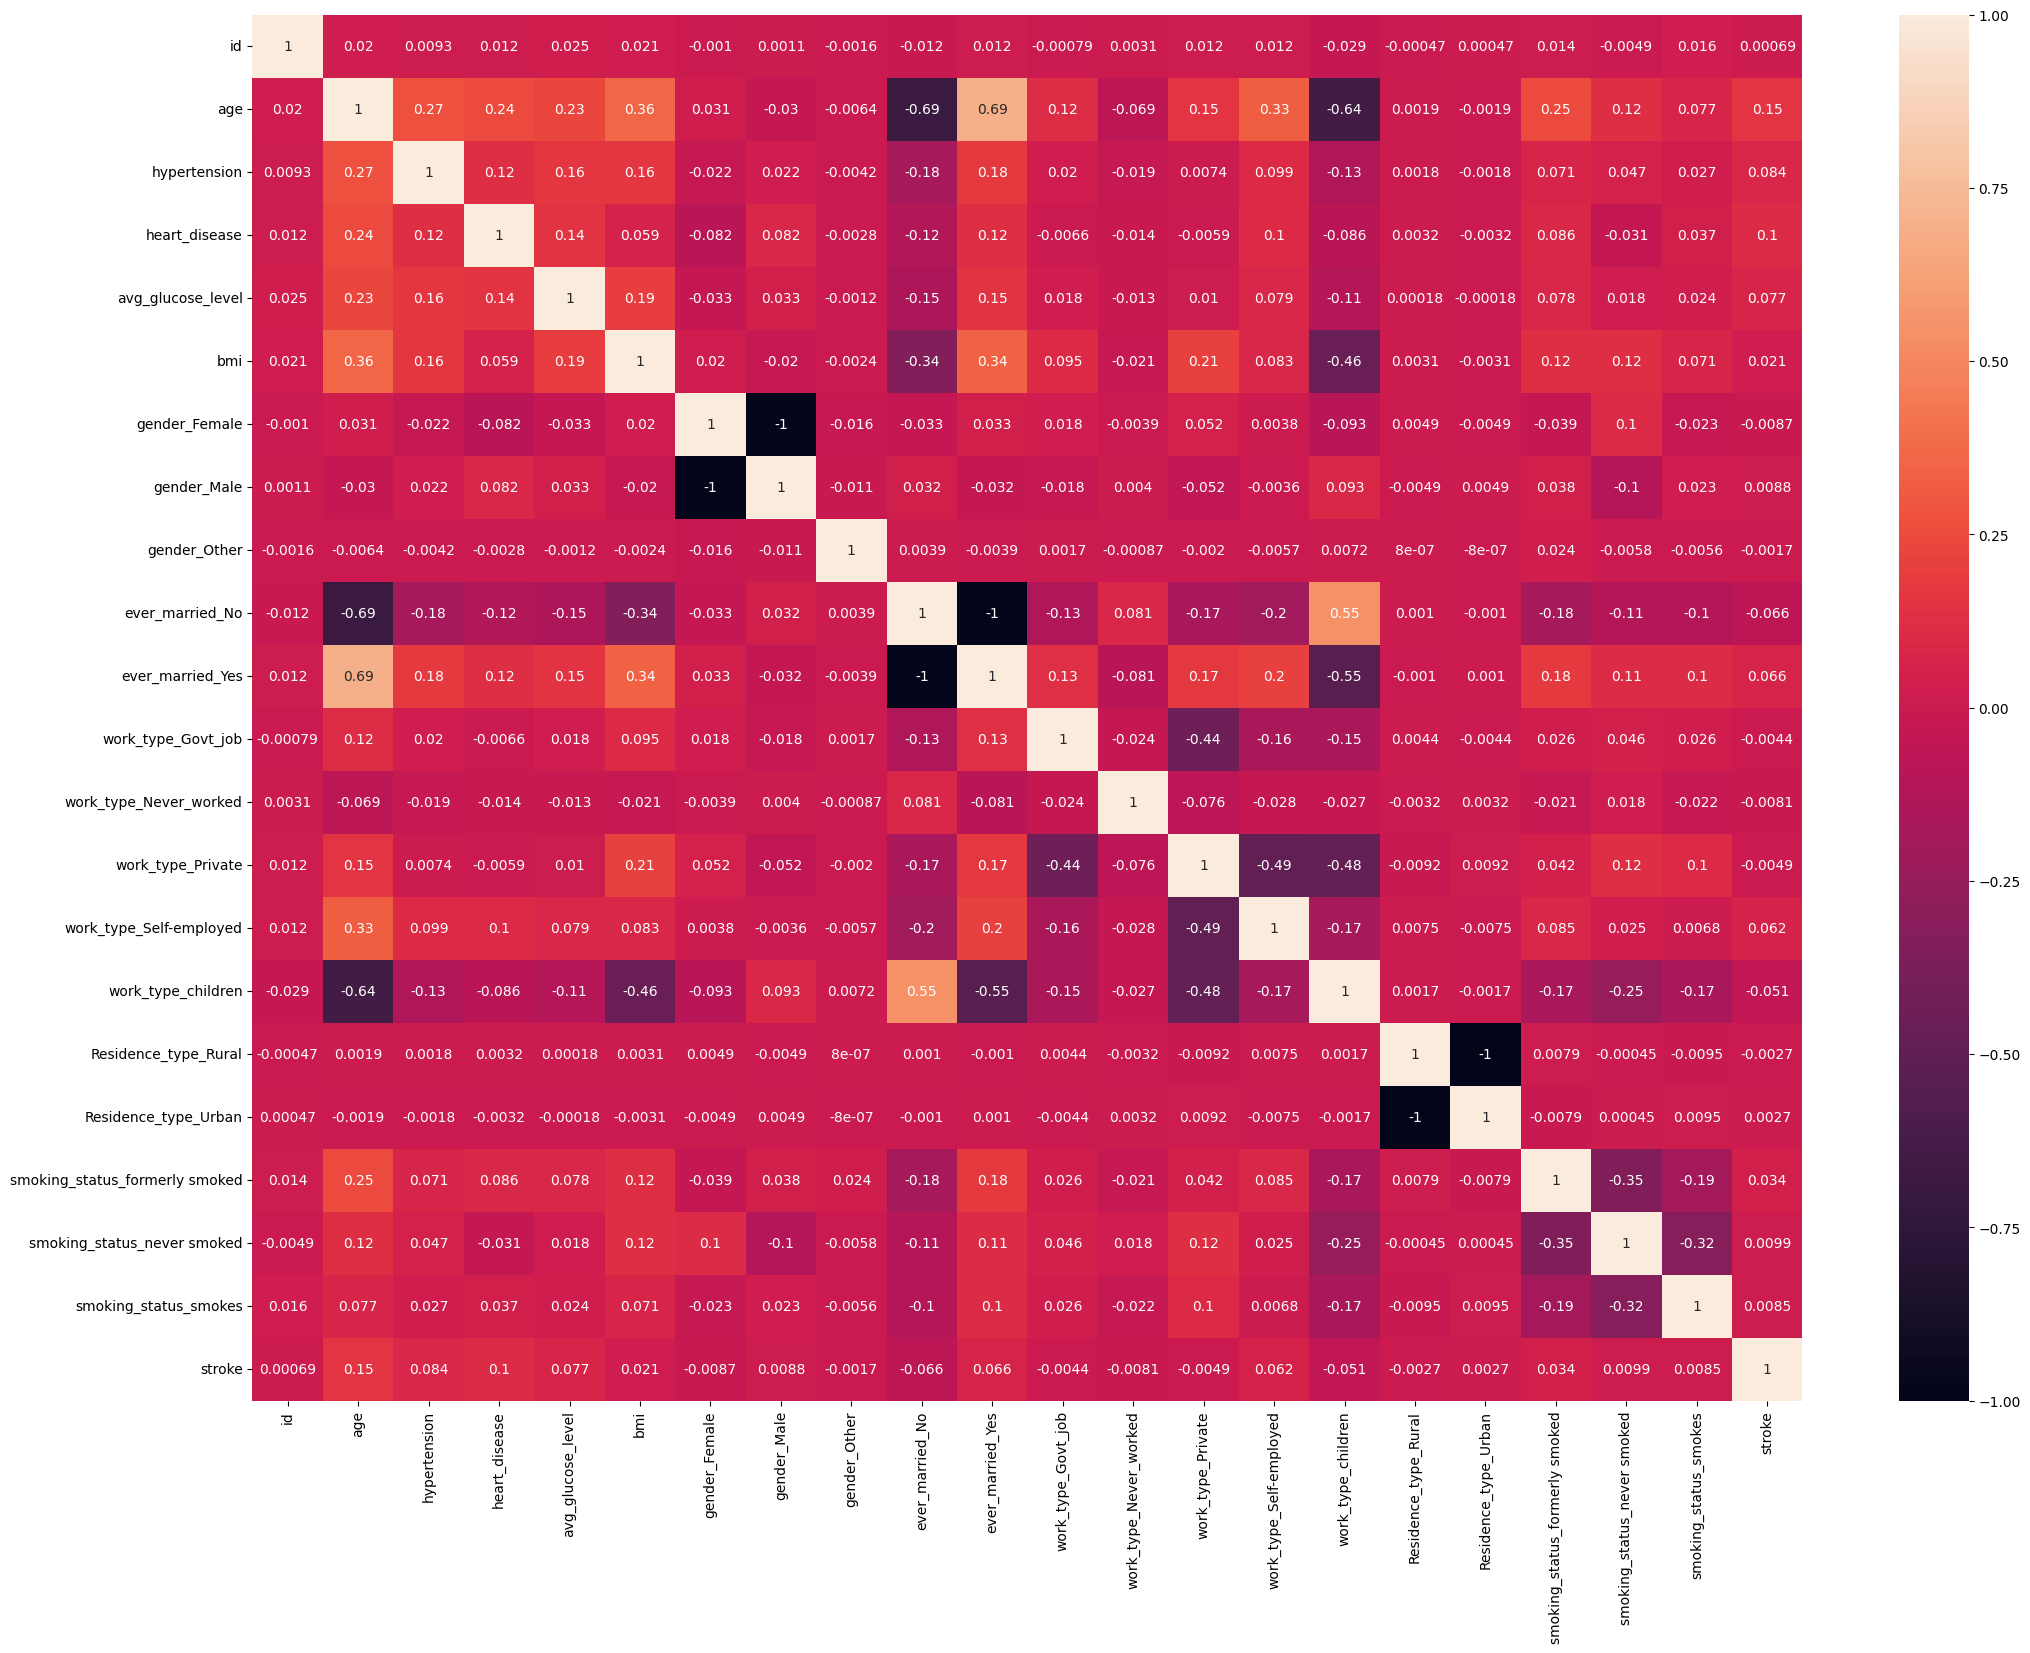

In [35]:
plt.figure(figsize=(25, 18))
sns.heatmap(train.corr(), annot=True)

In [36]:
cat_cols = train.drop(['id', 'age', 'avg_glucose_level', 'bmi'], axis=1)
num_cols = train[['age', 'avg_glucose_level', 'bmi']]

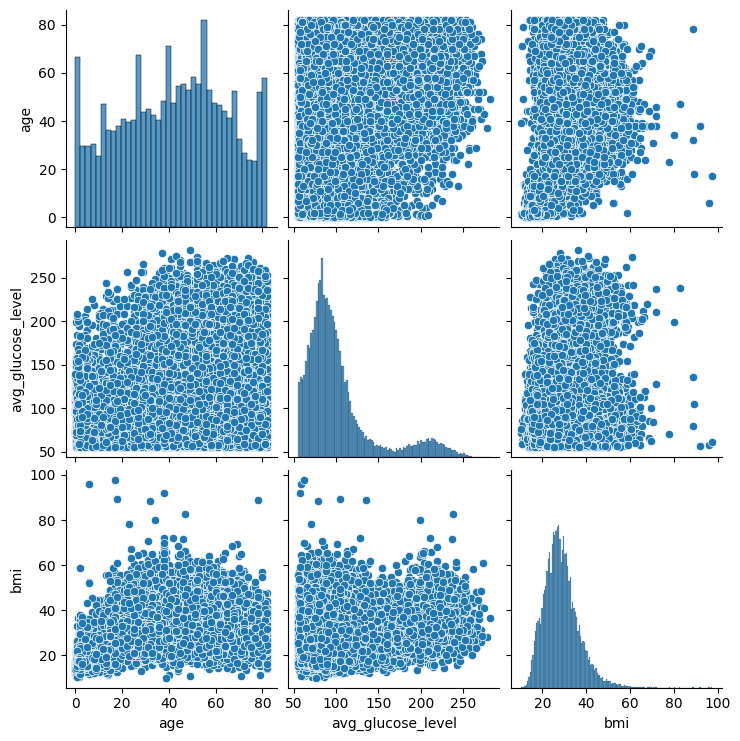

In [37]:
sns.pairplot(num_cols)
plt.show()

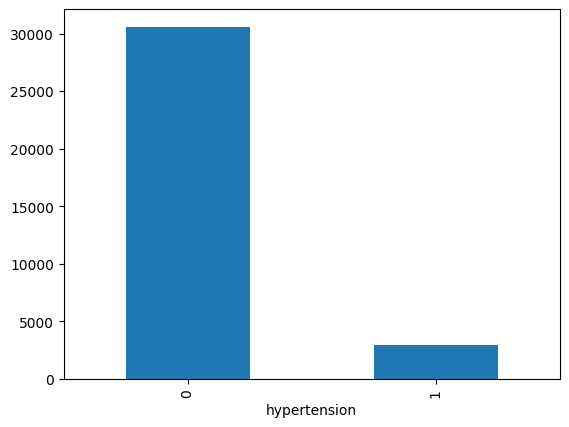

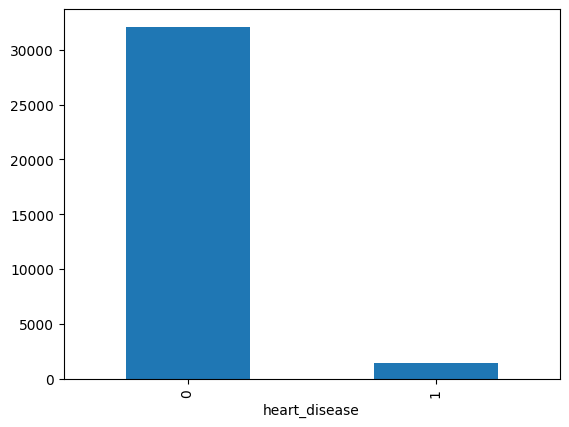

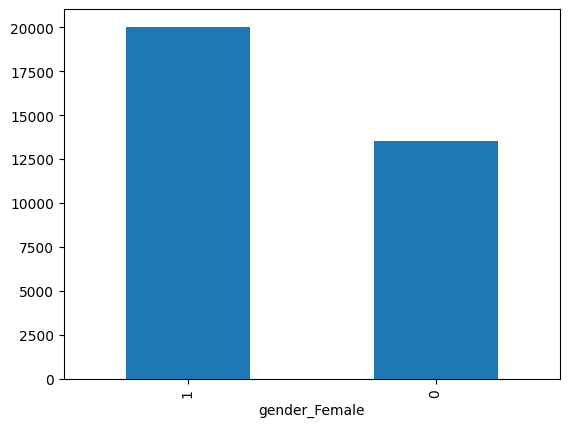

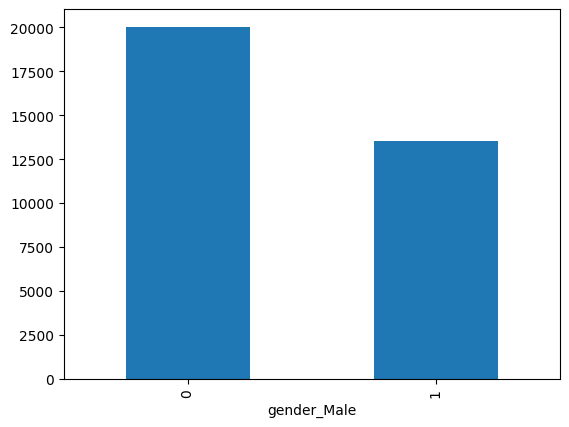

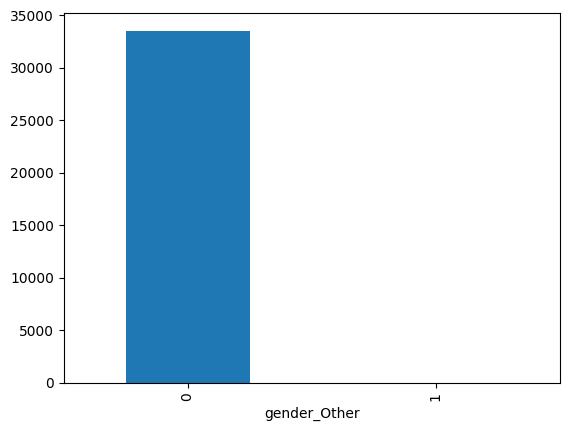

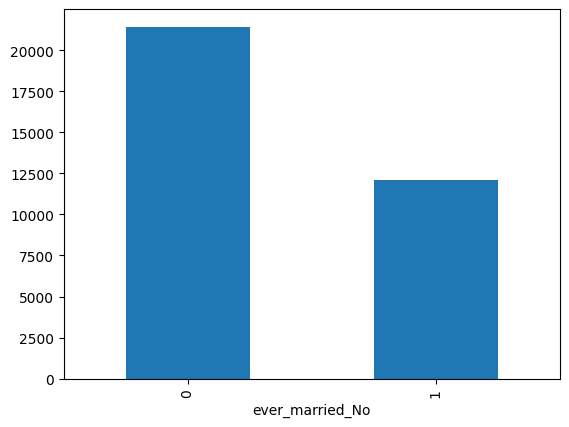

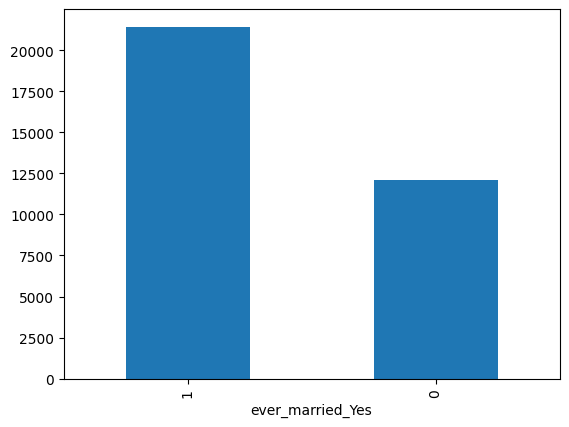

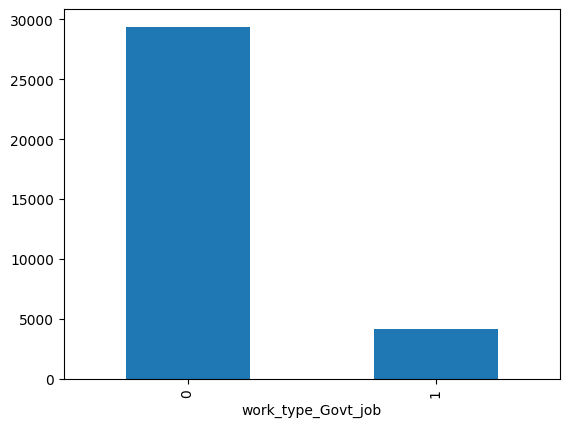

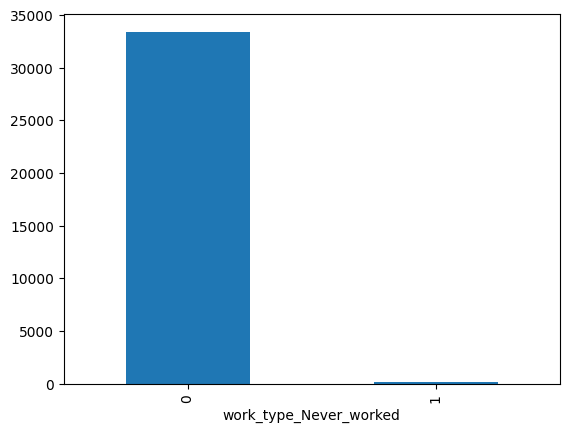

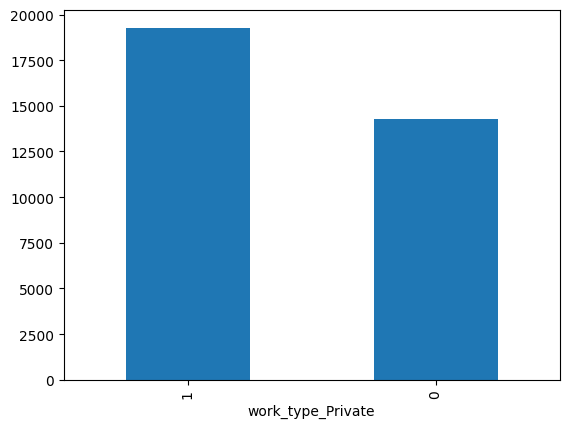

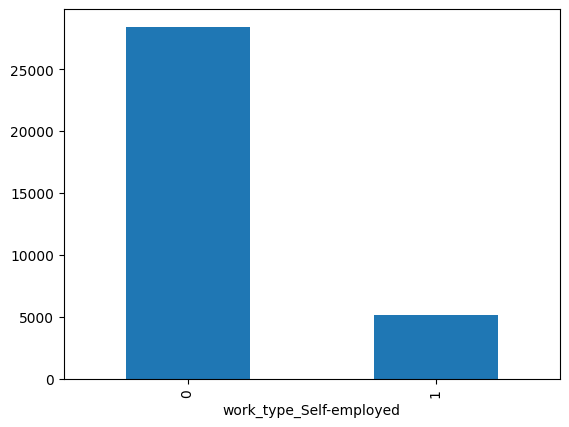

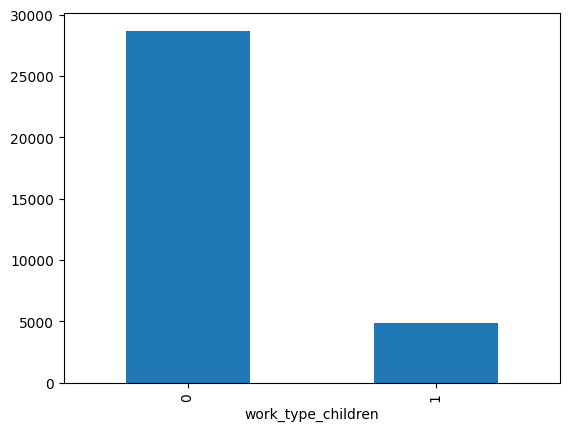

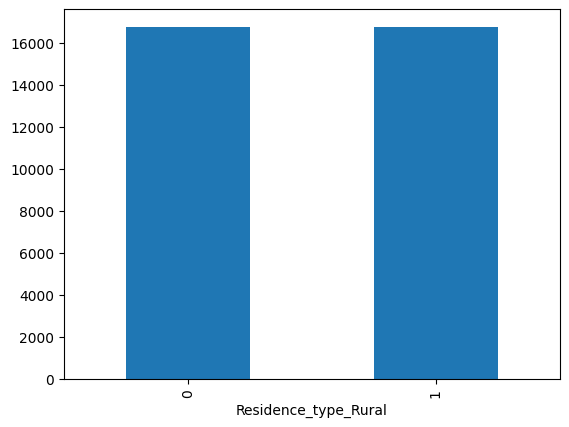

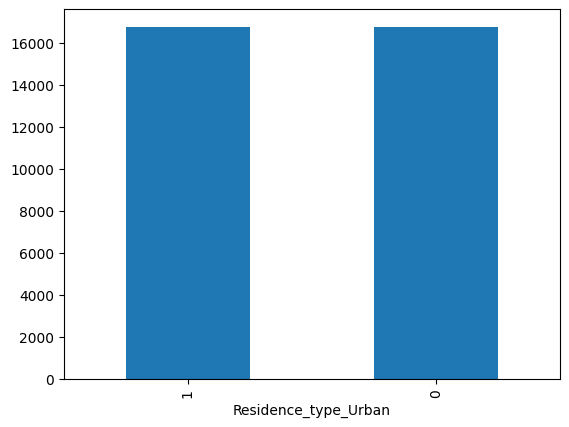

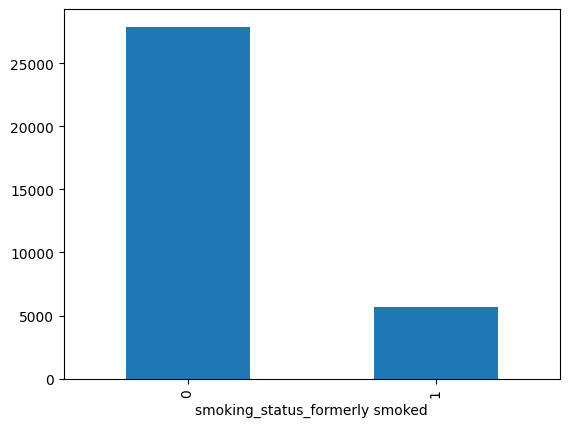

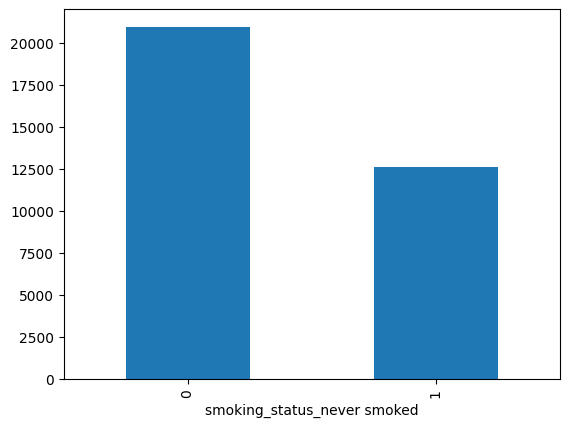

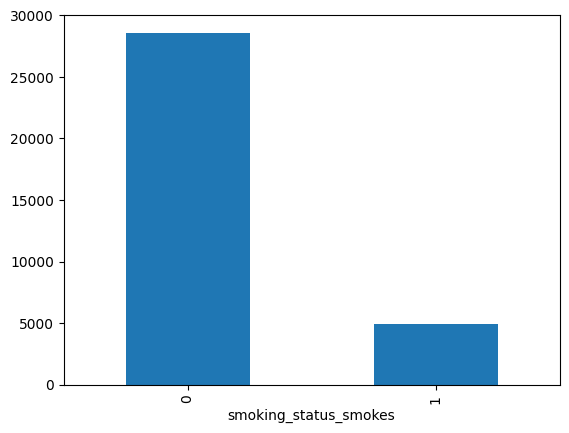

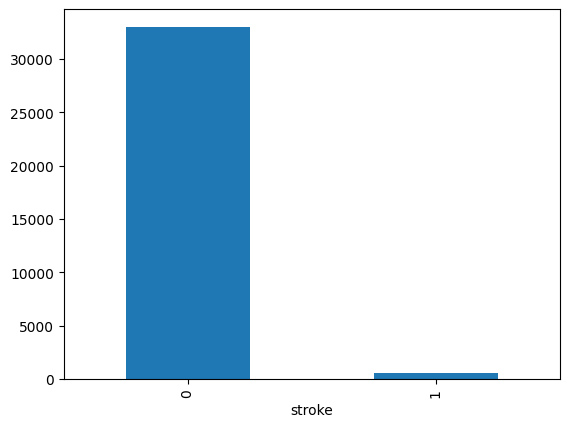

In [38]:
for i in cat_cols:
    train[i].value_counts().plot(kind='bar')
    plt.show()

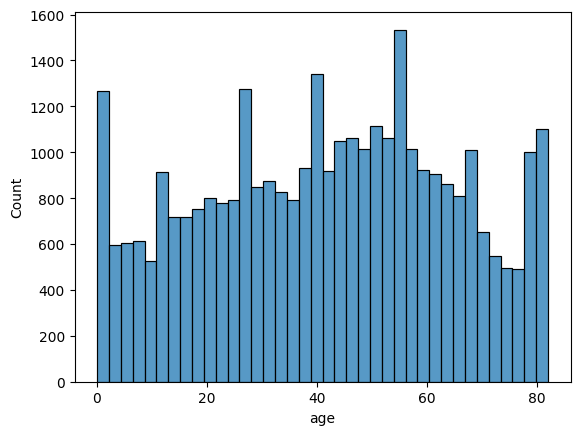

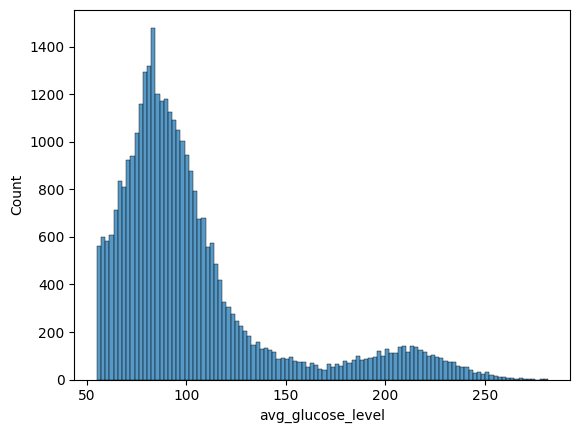

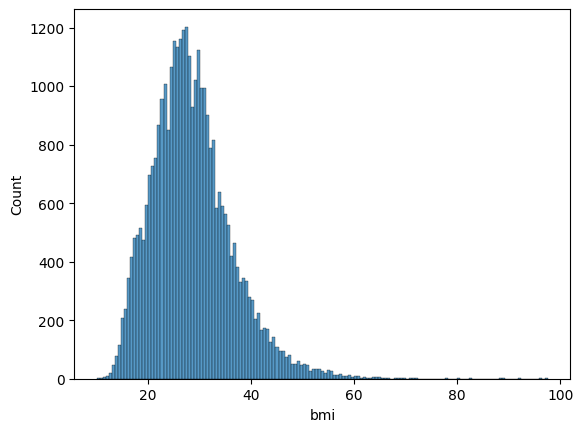

In [39]:
for i in num_cols:
    sns.histplot(x=train[i])
    plt.show()

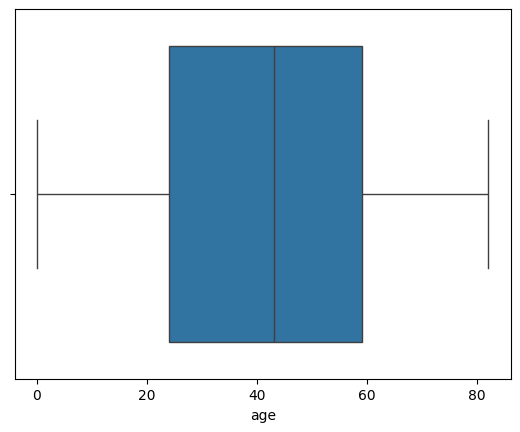

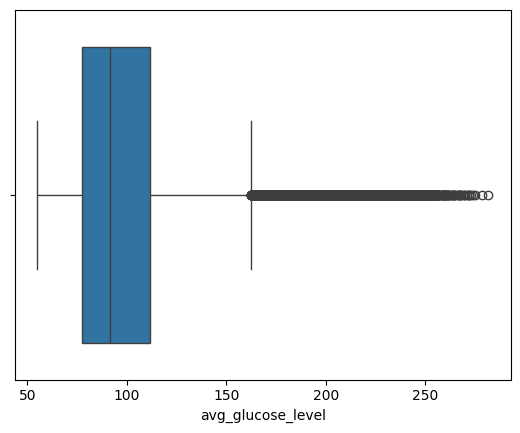

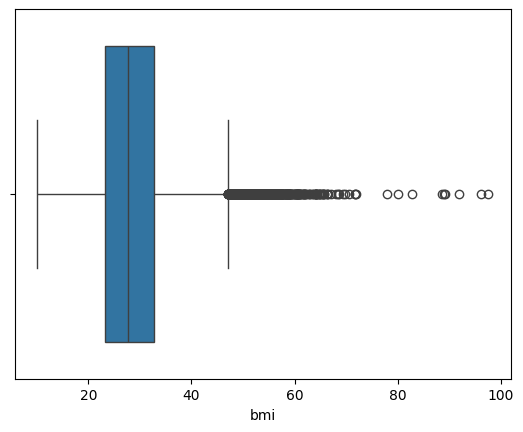

In [40]:
for i in num_cols:
    sns.boxplot(x=train[i])
    plt.show()

### 1.3.1 Omgaan met outliers

omdat extreme waardes bij age en 

In [41]:
num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen



In [42]:
test_data_ids = test['id']

In [43]:
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male
train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target

In [44]:
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male
test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target

In [45]:
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,30.0,0,0,63.60,33.3,0,0,0,0,1,0,0,0,0,0,1,0
1,75.0,1,0,215.17,48.0,1,1,0,0,0,1,0,0,0,1,0,0
2,15.0,0,0,135.22,19.0,0,0,0,0,1,0,0,0,0,1,0,0
3,47.0,0,0,64.89,28.2,0,1,0,0,0,1,0,1,0,1,0,0
4,49.0,0,0,222.34,28.8,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,9.0,0,0,109.80,14.5,0,0,0,0,0,0,1,0,0,0,0,0
33546,47.0,0,0,88.61,30.8,1,1,0,0,1,0,0,1,0,0,0,0
33547,3.0,0,0,89.68,16.2,1,0,0,0,0,0,1,0,0,0,0,0
33548,56.0,1,0,82.44,27.8,1,1,1,0,0,0,0,1,0,0,1,0


In [46]:
test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,52.0,0,0,97.32,21.8,1,1,0,0,1,0,0,1,0,0,1
1,30.0,0,0,227.99,47.7,1,1,0,0,1,0,0,1,0,0,1
2,26.0,0,0,113.28,24.4,1,1,0,0,1,0,0,1,0,1,0
3,24.0,0,0,79.15,21.0,1,1,0,0,1,0,0,1,1,0,0
4,63.0,0,0,89.69,33.3,1,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,24.0,0,0,77.54,25.0,1,0,0,0,1,0,0,0,0,1,0
8384,17.0,0,0,99.99,22.7,1,0,0,0,0,1,0,0,0,1,0
8385,11.0,0,0,80.11,22.2,1,0,0,0,0,0,1,1,0,0,0
8386,16.0,0,0,105.26,47.5,1,0,0,0,1,0,0,0,0,1,0


In [47]:
from imblearn.over_sampling import SMOTE


X = train.drop(columns=['stroke'])
y = train['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())


stroke
0    32691
1    32691
Name: count, dtype: int64


In [48]:
resampled_train = pd.DataFrame(X_resampled, columns=X.columns)
resampled_train['stroke'] = y_resampled
resampled_train.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000,65382.000000
mean,55.150502,0.082163,0.048500,116.160058,28.989538,0.461213,0.726362,0.073216,0.002157,0.449864,0.146722,0.074057,0.388226,0.130235,0.285262,0.091111,0.500000
std,22.574193,0.274615,0.214821,53.565151,6.464200,0.498497,0.445829,0.260493,0.046389,0.497484,0.353832,0.261866,0.487350,0.336564,0.451543,0.287769,0.500004
min,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,78.509736,24.748822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.462241,0.000000,0.000000,95.020000,28.377229,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,75.583395,0.000000,0.000000,133.854151,32.600000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,82.000000,1.000000,1.000000,281.590000,51.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Beschrijf de belangrijkste bevindingen van de EDA

### 1.5 Sommige regels en/of kolommen zijn soms niet relevant voor machine learning. Schoon de data op zodat alleen relevante regels resteren

In [49]:
X = train.drop('stroke', axis = 1)
y = train['stroke']

### 1.6 Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit

In [50]:
sc = StandardScaler()

train = sc.fit_transform(X_resampled) 

# 2. Evaluatie

### 2.1 Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritm

### 2.2 Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix

### 2.3 In de Kaggle competitie zie je dat er is gekozen voor de f1-score om te beoordelen hoe goed een model presteert. Leg uit waarom f1-score voor dit vraagstuk de beste maatstaf is

# 3. Modelleren en uitleg modellen

Pas cross-validation en hyperparameter tuning toe op ieder model.

Als je de beste hyperparameters voor een model hebt gevonden dan pas je het model met die hyperparameters toe op test.csv. De voorspellingen upload je op Kaggle om te zien hoe goed een model presteert.

De dataset is een “imbalanced dataset”. Leg uit waarom dit zo is. Er zijn meerdere technieken waarmee je voorspellingen voor zo’n dataset kunt verbeteren. Zonder toepassingvan deze technieken zullen je voorspellingen erg slecht zijn. Pas voor alle modellen ensembles minimaal 2 van deze technieken toe en leg uit hoe iedere techniek werk

## 3.1 KNN

#### 3.1.1 Leg uit hoe model werkt. Gebruik daarin onder andere termen “afstand”, “euclidean” en “manhattan

### 3.1.2 Leg uit waarom standaardisatie voor dit model van groot belang

### 3.1.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.1.4 Leg uit hoe regularisatie werkt voor dit model

## 3.2 Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
logreg = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'max_iter': [100, 200, 300],
              'solver': ['liblinear', 'sag', 'lbfgs', 'saga', 'newton-cholesky'],
              'n_jobs': [-1, 0, 1]}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Beste hyperparameters:", grid_search.best_params_)

logreg.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_
logreg_pred = best_logreg.predict(X_test)

accuracy = accuracy_score(logreg_pred, y_test)
f1 = f1_score(logreg_pred, y_test)

print(accuracy, f1)

c:\Users\j0rd4\anaconda3\envs\no\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2325 fits failed out of a total of 3375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\j0rd4\anaconda3\envs\no\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\j0rd4\anaconda3\envs\no\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\j0rd4\anaconda3\envs\no\Lib\site-packages\sklearn\linear_model\_logistic.

Beste hyperparameters: {'C': 0.1, 'max_iter': 100, 'n_jobs': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.8931939841957686 0.8920158754703366


c:\Users\j0rd4\anaconda3\envs\no\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
SVM_pred = logreg.predict(test)
SVM_pred_df = test_data_ids.to_frame()
SVM_pred_df['stroke'] = SVM_pred
SVM_pred_df.to_csv('logreg.csv', index=False)

### 3.2.1 Leg uit hoe het model werkt

Met logistic regression kun je de kans van een binair resultaat, dus bijvoorbeeld waar of niet waar, bepalen op basis van één of meer voorspellende variabelen met behulp van een logistische functie, dus in dit geval bepaald het model of iemand wel of geen hartinfarct krijgt.

Als eerste moet je de data splitsen in train en test sets, daarna moet je LogisticRegression activeren en bepalen welke hyperparameters je wilt en wat de waardes zijn, dit kun je gemakkelijk doen met gridsearch, gridsearch bepaalt wat de beste waarde is uit de gegeven waardes voor elke opgegeven parameter, wanneer dat gedaan is moet je het model fitten op de train set, daarna moet je een predict label maken met samples uit X, als laatste moet je het model beoordelen door een bepaalde metric te gebruiken, hier worden samples uit y vergeleken met de predict label, oftewel het model vergelijkt de werkelijke waardes met de voorspelde waardes.

### 3.2.2 Toon de wiskundig formule voor de loss-functie en ligt deze toe

![Schermafbeelding 2024-10-04 165406.png](<attachment:Schermafbeelding 2024-10-04 165406.png>)

De binary cross-entropy of log loss meet hoe onzeker je model is over de juiste classificatie. Hoe lager de verliesfunctie, hoe beter het model de data classificeert. Het gebruik van deze functie leidt tot goede probabilistische voorspellingen.

In deze functie:
- n het aantal voobeelden in je dataset.
- yi het werkelijke label van het i-de datapunt (0 of 1), in dit geval is dit y_test
- y met het dakje de voorspelde kans, dus in de code bovenin is dat logreg_pred.

GeeksforGeeks. (2024, May 27). Binary Cross Entropy/Log loss for binary classification. GeeksforGeeks. https://www.geeksforgeeks.org/binary-cross-entropy-log-loss-for-binary-classification/

De screenshot van de formule komt van chatgpt.
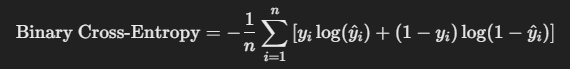

### 3.2.3 Leg uit wat gradient descent is in deze context. Leg dit uit aan de hand van een eenvoudig rekenvoorbeeld en geef hierbij de relevant wiskundige formules

Gradient descent is een optimalisatie-algoritme dat wordt gebruikt om de parameters van een model te minimaliseren, zoals in logistische regressie. Het werkt door iteratief de waarden van de parameters bij te werken in de richting van de negatieve gradient van de verliesfunctie.

Stel dat we een eenvoudige logistische regressie hebben, waarbij we de coëfficiënt 𝑤 willen optimaliseren. De verliesfunctie voor logistische regressie is de log-verliesfunctie:

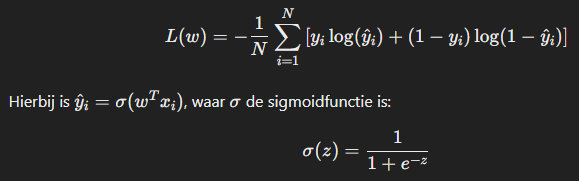

De gradient van de verliesfunctie 𝐿(𝑤) geeft de richting aan waarin we de parameters 
𝑤
w moeten bijwerken om de verliesfunctie te minimaliseren. De gradient is de afgeleide van de verliesfunctie ten opzichte van 
𝑤:

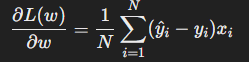

De update regel voor gradient descent is dit:

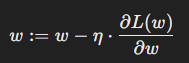

Tokuç, A. A. (2023, May 12). Gradient descent equation in logistic regression. Baeldung. https://www.baeldung.com/cs/gradient-descent-logistic-regression

De screen shots van de formules komen van chatgpt.

### 3.2.4 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

Dit zijn de vormen van regularisatie die van toepassing zijn op dit model:
- L1-regularisatie (Lasso): Deze vorm heeft de kracht om bepaalde coëfficiënten naar 0 te dwingen, dit leidt dan tot een model dat alleen relevante kenmerken tot zijn beschikking heeft. Hierdoor kan de kostenfunctie verlaagt worden en de interpretatie van het model makkelijker gemaakt worden. Wat feature selection betreft kan L1-regularisatie helpen bij het onderscheiden van relevante en irrelevante kenmerken en dan de relelvanten selecteren.
- L2-regularisatie (Ridge): Wat L2-regularisatie doet is een starfterm toevoegen aan de kostenfunctie die gelijk is aan de grootte van de coëfficiënten in het kwadraat, wat kan helpen bij het stabiliseren van de schattingen van de coëfficiënten.
- elasticnet: Elasticnet is een combinatie van L1 en L2

Code Labs Academy. (2024, June 5). Inzicht in L1 en L2 regularisatie: Belangrijkste strategieën om overfitting in modellen voor machinaal leren te voorkomen. https://codelabsacademy.com/nl/blog/the-role-of-l1-and-l2-regularization-in-preventing-overfitting-and-enhancing-model-generalization

Formules:
- L1:

  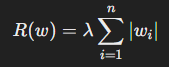

  Bij L1 is de totale verliesfunctie: VerliesfunctieL1 = Originele verliesfunctie + R(w)
- L2:

  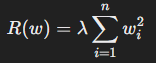
  
  Bij L2 is de totale verliesfunctie: VerliesfunctieL2 = Originele verliesfunctie + R(w)

https://chatgpt.com/c/670c19c4-8108-800c-bc87-65fb26a03cde


### 3.2.5 Beschrijf hoe regularisatie zich verhoudt ten opzichte van overfitting

Bij het gebruik van regularisatie wordt overfitting verminderd, maar op verschillende manieren. Het gebruik van L1-regularisatie kan leiden tot een eenvoudiger model met minder kenmerken, terwijl L2 geen kenmerken weg laat wat leidt tot een robuustere schatting.

Code Labs Academy. (2024, June 5). Inzicht in L1 en L2 regularisatie: Belangrijkste strategieën om overfitting in modellen voor machinaal leren te voorkomen. https://codelabsacademy.com/nl/blog/the-role-of-l1-and-l2-regularization-in-preventing-overfitting-and-enhancing-model-generalization

### 3.2.6 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

Aan de hand van de grid search die op het model toegepast is zijn de beste hyperparameters voor de f1-score C=0.1, max_iter=100, penalty='l1', n_jobs=-1 en solver='liblinear'. De f1-score die daar uitkwam is, afgerond op twee decimalen 0.89 

## 3.3 SVM

### 3.3.1 Beschrijf de werking van dit model. Toon hierbij de relevante wiskundige formules en leg ze uit aan de hand van een rekenvoorbeeld. Gebruik hierbij een klein deel van de dataset. Leg ook uit wat een kernel is en wat de kernel trick is

### 3.3.2 Toon de wiskundig formule voor de loss functie en ligt deze toe

### 3.3.3 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

### 3.3.4 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

## 3.4 Decision Tree

### 3.4.1 Beschrijf de werking van dit model

### 3.4.2 Beschrijf de criteria op basis waarvan de splitsingen in de beslisboon kunnen worden gemaakt

### 3.4.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.4.4 Leg uit wat ‘pruning’ is en beschrijf welke vormen hiervan zijn toegepast. Leg de relatie tussen ‘pruning’ en ‘underfitting / overfitting’ uit

## 3.5 Ensembles  (Random Forest, Gradient Boosted Boosted Decistion Trees en XGboost)

### 3.5.1 Beschrijf de werking van de 3 genoemde ensembles. Gebruik daarbij o.a. de termen “bagging (bootstrap aggregation)” en “boosting “. Leg daarbij uit welke ensembles relatief veel trainingstijd nodig hebben en welke weinig tijd. Gebruik daarbij o.a. de termen “sequential” en “parallel"

### 3.5.2 Bepaal bij welke hyperparameters ieder ensemble de beste resultaten geeft op de gekozen metric.

## 3.6 Zelf samengesteld ensemble

Ensemble dient te bestaan uit minimaal drie modellen

### 3.6.1 Leg uit hoe een ensemble werkt en beschrijf welke vorm van “voting” je hebtgekozen en waarom

### 3.6.2 Leg uit waarom je hebt gekozen voor de modellen in je ensemble

### 3.6.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

# 4. Conclusie en advies

### 4.1 Geef in een tabel een overzicht van de scores van alle toegepaste modellen en ensembles. Laat daarin van ieder model en ensemble zien hoe het presteerde in je notebook en op Kaggle

### 4.2 Welke model presteert het beste? Waarom? Bij welke parameters?

### 4.3 De prestaties van een model zijn belangrijk. Welke overwegingen spelen nog meer een rol, naast de prestaties van het model, om een juiste keuze voor een model te maken

### 4.4 Welke model adviseer je aan artsen om te gebruiken? Leg uit waarom?